## Introduction
In this lab, I will create and measure the relative performances of Random Forest vs Decion Trees Regression and XGBoost vs linear regression models for predicting house prices using the California Housing Dataset.
'Performance' means both speed and accuracy.


# XGBoost and Random Forest

let's import the required libraries:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import time
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [ ]:
# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### I wil see how many observations and features does the dataset have?


In [ ]:
N_observations, N_features = X.shape
print('Number of Observations: ' + str(N_observations))
print('Number of Features: ' + str(N_features))


Number of Observations: 20640
Number of Features: 8


This is a moderately sized dataset used for this analysis.  
Keep in mind we are only using one dataset so we have to consider that the comparison may change with scale.


### Initialize models
In this step I wil define the number of base estimators, or individual trees, to be used in each model, and then intialize models for Random Forest regression and XGBoost regression.  I'll just use the default parameters to make the performance comparisons. As a part of the performance comparison, I will also measure the training times for both models.


In [ ]:
# Initialize models
n_estimators=100
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)

In [ ]:
# Fit models
# Measure training time for Random Forest
start_time_rf = time.time()
rf.fit(X_train, y_train)
end_time_rf = time.time()
rf_train_time = end_time_rf - start_time_rf

# Measure training time for XGBoost
start_time_xgb = time.time()
xgb.fit(X_train, y_train)
end_time_xgb = time.time()
xgb_train_time = end_time_xgb - start_time_xgb

### let's use the fitted models to make predictions on the test set.
Also, I wil measure the time it takes for each model to make its predictions using the time.time() function to measure the times before and after each model prediction.


In [ ]:
# Measure prediction time for Random Forest
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

# Measure prediciton time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

### Calulate the MSE and R^2 values for both models


In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

### let's check the MSE and R^2 values for both models


In [ ]:
print(f'Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')
print(f'      XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}')

Random Forest:  MSE = 0.2554, R^2 = 0.8051
      XGBoost:  MSE = 0.2226, R^2 = 0.8301


You can see from the MSE and R^2 values that XGBoost is better than Random Forest, but the differences aren't overwhelming.


### let's see the timings for each model


In [ ]:
print(f'Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds')
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds')

Random Forest:  Training Time = 18.753 seconds, Testing time = 0.158 seconds
      XGBoost:  Training Time = 0.426 seconds, Testing time = 0.010 seconds


The difference in computation time between XGBoost and Random Forest for both training and testing is very impressive.


Next, I will generate scatter plots between the predicted and actual values for both models so you can visually evaluate how well each model performs.
I'll also plot lines one standard deviation of the test data above and below the ideal line, that is, the line that represents the perfect regressor, where the predictions are all correct.


### calculate the standard deviation of the test data


In [ ]:
# Standard deviation of y_test
std_y = np.std(y_test)

In [ ]:
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

# Measure prediciton time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')
print(f'      XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}')
print(f'Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds')
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds')
std_y = np.std(y_test)

Random Forest:  MSE = 0.2554, R^2 = 0.8051
      XGBoost:  MSE = 0.2226, R^2 = 0.8301
Random Forest:  Training Time = 18.753 seconds, Testing time = 0.161 seconds
      XGBoost:  Training Time = 0.426 seconds, Testing time = 0.009 seconds


### Linear Regression and Decision Tree Regression Models

Now, let's make Linear Regression and Decision Tree Regression models first..

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor



# Initialize Linear Regression and Decision Tree Regression models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)

# Measure training time for Linear Regression
start_time_lr = time.time()
lr.fit(X_train, y_train)
end_time_lr = time.time()
lr_train_time = end_time_lr - start_time_lr

# Measure training time for Decision Tree Regression
start_time_dt = time.time()
dt.fit(X_train, y_train)
end_time_dt = time.time()
dt_train_time = end_time_dt - start_time_dt

print(f'Linear Regression: Training Time = {lr_train_time:.3f} seconds')
print(f'Decision Tree:   Training Time = {dt_train_time:.3f} seconds')

Linear Regression: Training Time = 0.007 seconds
Decision Tree:   Training Time = 0.301 seconds


In [ ]:
# Measure prediction time for Linear Regression
start_time_lr = time.time()
y_pred_lr = lr.predict(X_test)
end_time_lr = time.time()
lr_pred_time = end_time_lr - start_time_lr

# Measure prediction time for Decision Tree Regression
start_time_dt = time.time()
y_pred_dt = dt.predict(X_test)
end_time_dt = time.time()
dt_pred_time = end_time_dt - start_time_dt

# Calculate MSE and R^2 for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Calculate MSE and R^2 for Decision Tree Regression
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Linear Regression:  MSE = {mse_lr:.4f}, R^2 = {r2_lr:.4f}')
print(f'  Decision Tree:  MSE = {mse_dt:.4f}, R^2 = {r2_dt:.4f}')
print(f'Linear Regression: Prediction Time = {lr_pred_time:.3f} seconds')
print(f'  Decision Tree: Prediction Time = {dt_pred_time:.3f} seconds')

Linear Regression:  MSE = 0.5559, R^2 = 0.5758
  Decision Tree:  MSE = 0.4952, R^2 = 0.6221
Linear Regression: Prediction Time = 0.004 seconds
  Decision Tree: Prediction Time = 0.003 seconds


### Visualize the results


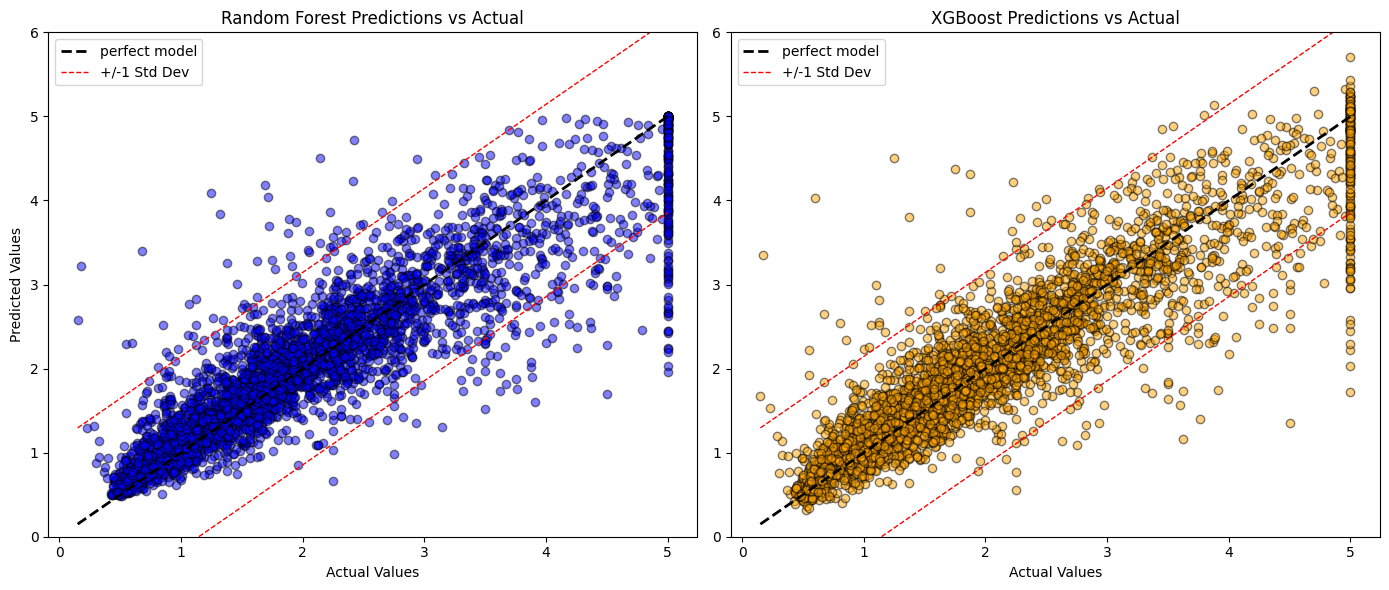

In [ ]:
plt.figure(figsize=(14, 6))

# Random Forest plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()


# XGBoost plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="orange",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()
plt.show()

Both models performed very well. Most of their predictions fall within a standard deviation of the target. Interestingly, random forest "respects" the upper bound (the maximum value) present in the target by staying within its limits, while XGBoost "overshoots", or exceeds this limit.


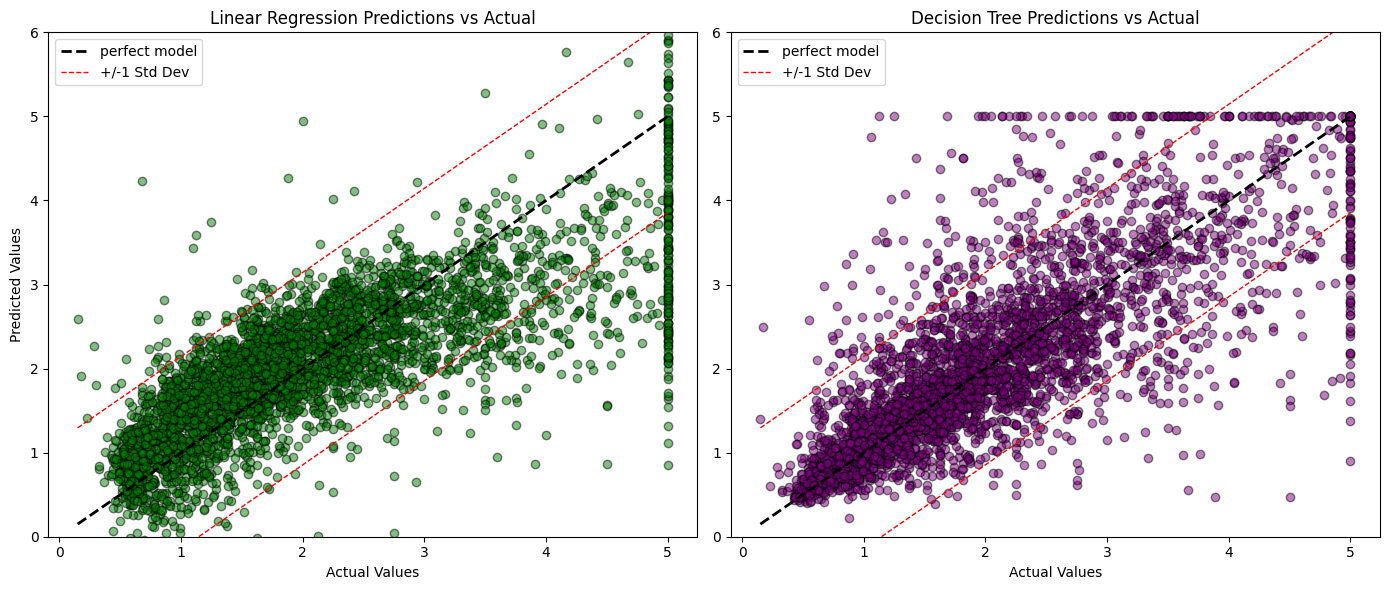

In [ ]:
plt.figure(figsize=(14, 6))

# Linear Regression plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color="green", ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1)
plt.ylim(0,6)
plt.title("Linear Regression Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()

# Decision Tree plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_dt, alpha=0.5, color="purple", ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1)
plt.ylim(0,6)
plt.title("Decision Tree Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()

plt.tight_layout()
plt.show()

### Compare all model performances

Let's compare the performance metrics and timings for all four models: Linear Regression, Decision Tree, Random Forest, and XGBoost.

In [ ]:
print("--- Model Performance Comparison ---")
print(f'Linear Regression:  MSE = {mse_lr:.4f}, R^2 = {r2_lr:.4f}, Train Time = {lr_train_time:.3f} s, Pred Time = {lr_pred_time:.3f} s')
print(f'  Decision Tree:  MSE = {mse_dt:.4f}, R^2 = {r2_dt:.4f}, Train Time = {dt_train_time:.3f} s, Pred Time = {dt_pred_time:.3f} s')
print(f'Random Forest:      MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}, Train Time = {rf_train_time:.3f} s, Pred Time = {rf_pred_time:.3f} s')
print(f'      XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}, Train Time = {xgb_train_time:.3f} s, Pred Time = {xgb_pred_time:.3f} s')

--- Model Performance Comparison ---
Linear Regression:  MSE = 0.5559, R^2 = 0.5758, Train Time = 0.007 s, Pred Time = 0.004 s
  Decision Tree:  MSE = 0.4952, R^2 = 0.6221, Train Time = 0.301 s, Pred Time = 0.003 s
Random Forest:      MSE = 0.2554, R^2 = 0.8051, Train Time = 18.753 s, Pred Time = 0.161 s
      XGBoost:  MSE = 0.2226, R^2 = 0.8301, Train Time = 0.426 s, Pred Time = 0.009 s


### Analysis of Linear Regression and Decision Tree Plots


*   **Linear Regression:** The points are widely scattered around the "perfect model" line (black dashed line), indicating that the Linear Regression model's predictions have a relatively large amount of error. Many points fall outside the "+/- 1 Std Dev" lines (red dashed lines), further highlighting the model's limited accuracy in predicting the house prices for this dataset.
*   **Decision Tree:** The points for the Decision Tree model are also somewhat scattered around the "perfect model" line, but appear slightly more clustered than those of the Linear Regression model.

However, compared to the Random Forest and XGBoost plots, the predictions are still less accurate, with a noticeable spread of points outside the standard deviation lines. The Decision Tree plot also shows a step-like pattern, which is characteristic of decision tree models due to their piecewise constant predictions.

These plots visually confirm the lower R² and higher MSE values observed for Linear Regression and Decision Tree compared to the ensemble methods, indicating that these simpler models do not capture the underlying patterns in the data as effectively for this regression task.